In [1]:
from pystac_client import Client

AWS_LIDAR_STAC_CATALOG_URL = (
    "https://usgs-lidar-stac.s3-us-west-2.amazonaws.com/ept/catalog.json"
)

client = Client.open(AWS_LIDAR_STAC_CATALOG_URL)

In [2]:
items = [item for item in client.get_all_items()]

In [3]:
print(len(items))
print(items[0])
print(type(items[0]))

1989
<Item id=AK_BrooksCamp_2012>
<class 'pystac.item.Item'>


In [4]:
one_item = items[0]

In [13]:
one_item

id: AK_BrooksCamp_2012
"bbox: [-155.83844721508854, 58.46319052724473, -155.59590208843736, 58.58505209347513]"
description: A USGS Lidar pointcloud in Entwine/EPT format
pc:count: 529285317
pc:type: lidar
pc:encoding: ept
"pc:schemas: [{'name': 'X', 'offset': -17334459, 'scale': 0.01, 'size': 4, 'type': 'signed'}, {'name': 'Y', 'offset': 8078265, 'scale': 0.01, 'size': 4, 'type': 'signed'}, {'name': 'Z', 'offset': 486, 'scale': 0.01, 'size': 4, 'type': 'signed'}, {'name': 'Intensity', 'size': 2, 'type': 'unsigned'}, {'name': 'ReturnNumber', 'size': 1, 'type': 'unsigned'}, {'name': 'NumberOfReturns', 'size': 1, 'type': 'unsigned'}, {'name': 'ScanDirectionFlag', 'size': 1, 'type': 'unsigned'}, {'name': 'EdgeOfFlightLine', 'size': 1, 'type': 'unsigned'}, {'name': 'Classification', 'size': 1, 'type': 'unsigned'}, {'name': 'ScanAngleRank', 'size': 4, 'type': 'floating'}, {'name': 'UserData', 'size': 1, 'type': 'unsigned'}, {'name': 'PointSourceId', 'size': 2, 'type': 'unsigned'}, {'name': 'GpsTime', 'size': 8, 'type': 'floating'}, {'name': 'OriginId', 'size': 4, 'type': 'unsigned'}]"
proj:epsg: 3857
"proj:projjson: {'$schema': 'https://proj.org/schemas/v0.6/projjson.schema.json', 'type': 'ProjectedCRS', 'name': 'WGS 84 / Pseudo-Mercator', 'base_crs': {'name': 'WGS 84', 'datum_ensemble': {'name': 'World Geodetic System 1984 ensemble', 'members': [{'name': 'World Geodetic System 1984 (Transit)', 'id': {'authority': 'EPSG', 'code': 1166}}, {'name': 'World Geodetic System 1984 (G730)', 'id': {'authority': 'EPSG', 'code': 1152}}, {'name': 'World Geodetic System 1984 (G873)', 'id': {'authority': 'EPSG', 'code': 1153}}, {'name': 'World Geodetic System 1984 (G1150)', 'id': {'authority': 'EPSG', 'code': 1154}}, {'name': 'World Geodetic System 1984 (G1674)', 'id': {'authority': 'EPSG', 'code': 1155}}, {'name': 'World Geodetic System 1984 (G1762)', 'id': {'authority': 'EPSG', 'code': 1156}}, {'name': 'World Geodetic System 1984 (G2139)', 'id': {'authority': 'EPSG', 'code': 1309}}], 'ellipsoid': {'name': 'WGS 84', 'semi_major_axis': 6378137, 'inverse_flattening': 298.257223563}, 'accuracy': '2.0', 'id': {'authority': 'EPSG', 'code': 6326}}, 'coordinate_system': {'subtype': 'ellipsoidal', 'axis': [{'name': 'Geodetic latitude', 'abbreviation': 'Lat', 'direction': 'north', 'unit': 'degree'}, {'name': 'Geodetic longitude', 'abbreviation': 'Lon', 'direction': 'east', 'unit': 'degree'}]}, 'id': {'authority': 'EPSG', 'code': 4326}}, 'conversion': {'name': 'Popular Visualisation Pseudo-Mercator', 'method': {'name': 'Popular Visualisation Pseudo Mercator', 'id': {'authority': 'EPSG', 'code': 1024}}, 'parameters': [{'name': 'Latitude of natural origin', 'value': 0, 'unit': 'degree', 'id': {'authority': 'EPSG', 'code': 8801}}, {'name': 'Longitude of natural origin', 'value': 0, 'unit': 'degree', 'id': {'authority': 'EPSG', 'code': 8802}}, {'name': 'False easting', 'value': 0, 'unit': 'metre', 'id': {'authority': 'EPSG', 'code': 8806}}, {'name': 'False northing', 'value': 0, 'unit': 'metre', 'id': {'authority': 'EPSG', 'code': 8807}}]}, 'coordinate_system': {'subtype': 'Cartesian', 'axis': [{'name': 'Easting', 'abbreviation': 'X', 'direction': 'east', 'unit': 'metre'}, {'name': 'Northing', 'abbreviation': 'Y', 'direction': 'north', 'unit': 'metre'}]}, 'scope': 'Web mapping and visualisation.', 'area': 'World between 85.06°S and 85.06°N.', 'bbox': {'south_latitude': -85.06, 'west_longitude': -180, 'north_latitude': 85.06, 'east_longitude': 180}, 'id': {'authority': 'EPSG', 'code': 3857}}"
datetime: 2023-06-06T15:59:46.762487Z
https://stac-extensions.github.io/pointcloud/v1.0.0/schema.json


In [9]:
import json

json.dumps(one_item.to_dict())

'{"type": "Feature", "stac_version": "1.0.0", "id": "AK_BrooksCamp_2012", "properties": {"description": "A USGS Lidar pointcloud in Entwine/EPT format", "pc:count": 529285317, "pc:type": "lidar", "pc:encoding": "ept", "pc:schemas": [{"name": "X", "offset": -17334459, "scale": 0.01, "size": 4, "type": "signed"}, {"name": "Y", "offset": 8078265, "scale": 0.01, "size": 4, "type": "signed"}, {"name": "Z", "offset": 486, "scale": 0.01, "size": 4, "type": "signed"}, {"name": "Intensity", "size": 2, "type": "unsigned"}, {"name": "ReturnNumber", "size": 1, "type": "unsigned"}, {"name": "NumberOfReturns", "size": 1, "type": "unsigned"}, {"name": "ScanDirectionFlag", "size": 1, "type": "unsigned"}, {"name": "EdgeOfFlightLine", "size": 1, "type": "unsigned"}, {"name": "Classification", "size": 1, "type": "unsigned"}, {"name": "ScanAngleRank", "size": 4, "type": "floating"}, {"name": "UserData", "size": 1, "type": "unsigned"}, {"name": "PointSourceId", "size": 2, "type": "unsigned"}, {"name": "Gps

In [15]:
from pathlib import Path

ndjson = Path("../data/interim/stac/aws_ept_items.ndjson").resolve()

with open(ndjson, "w") as f:
    for item in items:
        item_dict = item.to_dict()
        # pgstac requires a field referencing the collection
        item_dict["collection"] = "3dep"
        f.write(json.dumps(item_dict))
        f.write("\n")

In [27]:
api = Client.open("http://localhost:8082")

In [48]:
from shapely import Point

mn_test_point = Point(-90.47432296715354, 47.745361222444245)
joplin_test_point = Point(-94.50714111328126, 37.073258333985564)

results = api.search(intersects=mn_test_point)

In [51]:
items = list(results.items())

In [55]:
items[1].get_assets(role="entwine")

{}

Warning 1: HTTP response code on https://arturo-stac-api-test-data.s3.amazonaws.com/joplin/images/may24C365000e4105000n.tif.msk: 403
Warning 1: HTTP response code on https://arturo-stac-api-test-data.s3.amazonaws.com/joplin/images/may24C365000e4105000n.tif.MSK: 403


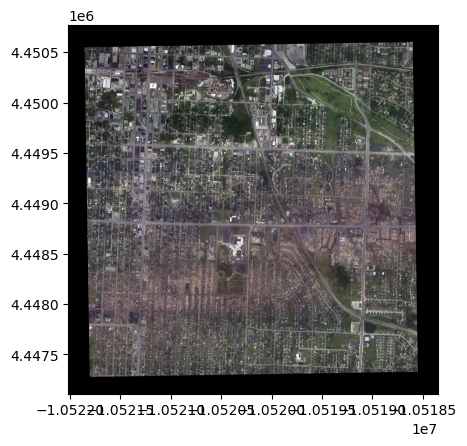

<Axes: >

In [47]:
import rasterio
from rasterio.plot import show

src = rasterio.open(item.assets["COG"].href)
show(src)

In [42]:
print(item.get_assets())

{'COG': <Asset href=https://arturo-stac-api-test-data.s3.amazonaws.com/joplin/images/may24C372500e4107500n.tif>}
